# Social Network Analysis - Descriptive Analysis Notebook

# 1. Imports

In [77]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# 2. Reading the source files

In [6]:
df_posts = pd.read_csv(
    "../data/dataset.csv",
    delimiter=",",
)
df_edges = pd.read_csv(
    "../data/graph.csv",
    delimiter=",",
)

,timestamp,text,text_id,user,user_id
0,1730332800000,Running a business means juggling countless ad...,2018569761,danielwoodard,1077866112
1,1730332800000,Liz Truss is walking in the lingering shadow o...,2092717718,nelsonjacqueline,1089670430
2,1730332800000,The UK is bracing for war as government buildi...,2059143248,ihooper,1007478642
3,1730332800000,Marrying a second or third cousin once removed...,2008209828,wrightnicholas,1039258480
4,1730332800000,It's truly disgraceful how the Indian National...,2001239278,michael51,1021455936
...,...,...,...,...,...
70255,1730419192000,"@bakerjulie: ""Saranghae, I’m your resident K-P...",2086649509,valdezjennifer,1094330726
70256,1730419192000,Soaring to new heights with @sweeneyanthony! T...,2039889186,nashshaun,1015245531
70257,1730419194000,"Hey @james20 @paul47, did you see the latest f...",2020468196,brownregina,1029384492
70258,1730419198000,Check out the fundraiser exhibition by @joanna...,2037744299,dkey,1046050046


# 3. Pre-Processing

## 3.1 Convert Unix-Timestamps into Timestamps of the format YYYY-MM-DD HH:MM:SS

In [20]:
df_posts[
    "timestamp"
] = pd.to_datetime(
    df_posts[
        "timestamp"
    ],
    unit="ms",
    utc=True,
)

# Add column hour to count the number of posts for every hour
df_posts["hour"] = (
    df_posts[
        "timestamp"
    ].dt.hour
)

df_posts.head(10)

,timestamp,text,text_id,user,user_id,hour
0,2024-10-31 00:00:00+00:00,Running a business means juggling countless ad...,2018569761,danielwoodard,1077866112,0
1,2024-10-31 00:00:00+00:00,Liz Truss is walking in the lingering shadow o...,2092717718,nelsonjacqueline,1089670430,0
2,2024-10-31 00:00:00+00:00,The UK is bracing for war as government buildi...,2059143248,ihooper,1007478642,0
3,2024-10-31 00:00:00+00:00,Marrying a second or third cousin once removed...,2008209828,wrightnicholas,1039258480,0
4,2024-10-31 00:00:00+00:00,It's truly disgraceful how the Indian National...,2001239278,michael51,1021455936,0
5,2024-10-31 00:00:00+00:00,The schools are teaching kids about climate ch...,2068121373,ihooper,1007478642,0
6,2024-10-31 00:00:00+00:00,"Making $20,780 every 5 days with Mrs. Stephani...",2018541552,ahenderson,1072983630,0
7,2024-10-31 00:00:00+00:00,@mckenzieestrada fights for women's rights but...,2083521261,mark89,1076049719,0
8,2024-10-31 00:00:00+00:00,@jonathanreynolds: SUNSHINE SUNSHINE SUNSHINE ...,2055945627,andrea21,1080017323,0
9,2024-10-31 00:00:00+00:00,"Hey guys, instead of stealing toilets from Ukr...",2059294175,williamellis,1013529471,0


## 4. Determine basic measures for the Social Network
1. Number of posts from different perspectives:
   1. Total number of posts
   2. Total number of posts per hour
   3. Total number of posts per user
   4. Distribution of the number of posts

2. Which nodes are the most important in the network?
   1. Degree Centrality
   2. Eigenvector Centrality
   3. Katz/PageRank Centrality
   4. Betweeness Centrality
   5. Closeness Centrality


## 4.2 Total number of posts and posts per hour

In [23]:
total_number_of_posts = df_posts.shape[
    0
]
print(
    f"The dataset contains: {total_number_of_posts} posts."
)

The dataset contains: 70260 posts.


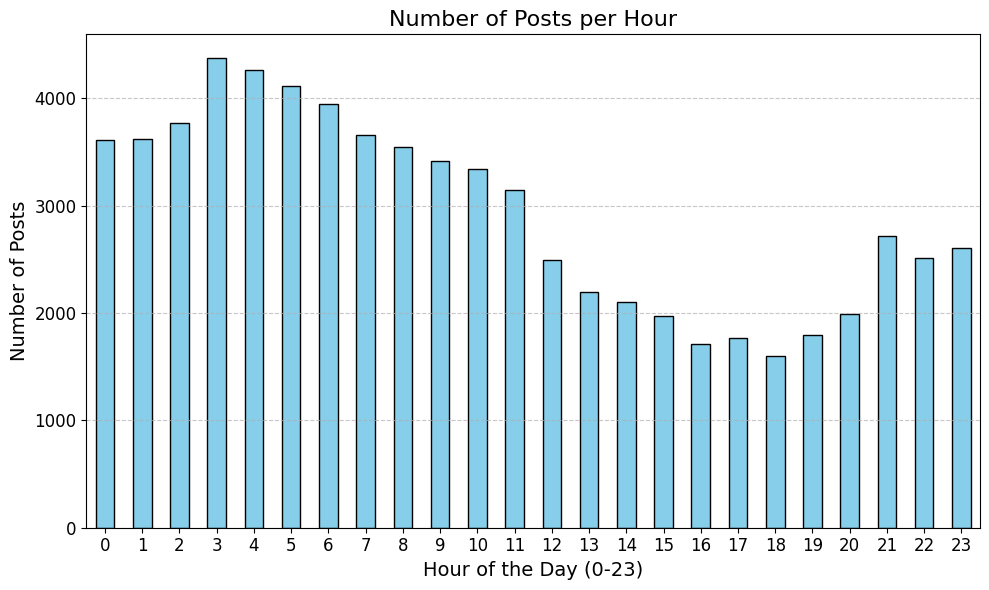

In [24]:
# Count the number of posts by counting tuples according to their value in the column 'hour'
hourly_counts = df_posts.groupby(
    "hour"
).size()

# Plot the result in a bar chart
plt.figure(
    figsize=(10, 6)
)
hourly_counts.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black",
)
plt.title(
    "Number of Posts per Hour",
    fontsize=16,
)
plt.xlabel(
    "Hour of the Day (0-23)",
    fontsize=14,
)
plt.ylabel(
    "Number of Posts",
    fontsize=14,
)
plt.xticks(
    rotation=0,
    fontsize=12,
)
plt.yticks(
    fontsize=12
)
plt.grid(
    axis="y",
    linestyle="--",
    alpha=0.7,
)
plt.tight_layout()
plt.show()

# You can find the figure also in the directory docs!

## 4.3 Total number of users/nodes

In [35]:
total_number_of_nodes = df_posts[
    "user_id"
].nunique()
print(
    f"The dataset contains: {total_number_of_nodes} unique users"
)

# Create a DataFrame with all unique users
df_nodes = df_posts.drop_duplicates(
    subset=[
        "user_id"
    ]
)
df_nodes.reset_index(
    drop=True,
    inplace=True,
)
df_nodes = df_nodes[
    [
        "user_id",
        "user",
    ]
]

# Store dataframe as CSV-File (Uncomment line below)
# df_nodes.to_csv("../data/nodes.csv", index=False, sep=",")

The dataset contains: 46755 unique users


## 4.4 Determine users with the most posts

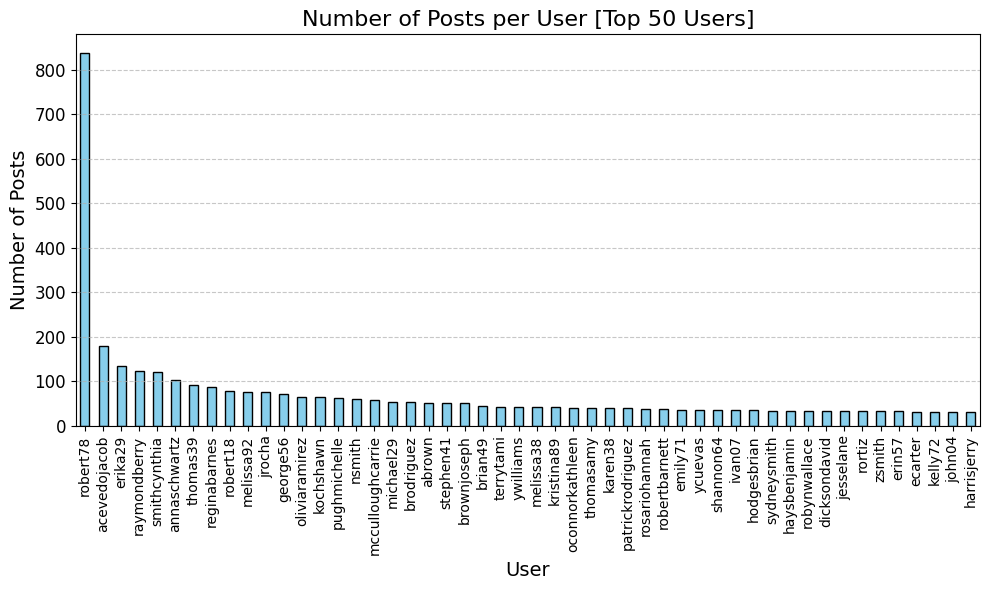

In [51]:
users_counts = (
    df_posts.groupby(
        "user"
    )
    .size()
    .sort_values(
        ascending=False
    )
)
top_50_users = users_counts.nlargest(
    50
)

plt.figure(
    figsize=(10, 6)
)
top_50_users.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black",
)
plt.title(
    "Number of Posts per User [Top 50 Users]",
    fontsize=16,
)
plt.xlabel(
    "User",
    fontsize=14,
)
plt.ylabel(
    "Number of Posts",
    fontsize=14,
)
plt.xticks(
    rotation=90,
    fontsize=10,
)
plt.yticks(
    fontsize=12
)
plt.grid(
    axis="y",
    linestyle="--",
    alpha=0.7,
)
plt.tight_layout()
plt.savefig(
    "../docs/number_of_posts_per_user_top_50.png"
)

# 5. Determine the most popluar user according to centrality measures

## Process nodes and edges from the dataset


In [57]:
G = nx.from_pandas_edgelist(
    df_edges,
    source="source",
    target="target",
)

## 5.1 Degree Centrality

In [73]:
degree_centrality = nx.degree_centrality(
    G
)

## 5.2 Eigenvector Centrality

In [74]:
eigenvector_centrality = nx.eigenvector_centrality(
    G,
    max_iter=1000,
    tol=1e-06,
    weight="weight",
)

{1084949174: 0.0013453365699462843, 1050463558: 0.0004444512376480468, 1002148361: 0.0004992669423668196, 1000741574: 0.00090869746318651, 1019020642: 0.0013164145018131129, 1044910984: 0.0004666118127049536, 1032965820: 5.472596696520787e-05, 1045532631: 4.2183432584888055e-05, 1062570867: 0.00043713161346270777, 1093616433: 4.344824067358533e-05, 1046494658: 6.427902296809804e-05, 1071753837: 0.01760780436386043, 1005890294: 6.460579843592408e-05, 1088712592: 6.355226632107535e-05, 1087450175: 4.431614190520563e-05, 1059839736: 5.4696056794742594e-05, 1069823047: 3.3473968022937216e-05, 1026118838: 5.362415456603933e-05, 1073919686: 6.451662437646492e-05, 1060428001: 3.32482446227816e-05, 1050607585: 4.1533943624455345e-05, 1001691761: 0.016663384031531416, 1070498956: 5.4650191541849175e-05, 1071870955: 4.308973946509556e-05, 1035595201: 5.315997236763487e-05, 1051971605: 3.279266907449417e-05, 1015062812: 3.318448785246986e-05, 1034483550: 3.173505219239617e-05, 1029385317: 3.29883

## 5.3 Page-Rank Centrality

In [67]:
p_rank = nx.pagerank(
    G,
    alpha=0.85,
    max_iter=100,
    tol=1e-06,
    weight="weight",
)

In [68]:
p_rank_keys = (
    p_rank.keys()
)
p_rank_values = (
    p_rank.values()
)

data_page_rank = {
    "user_id": p_rank_keys,
    "page_rank_values": p_rank_values,
}

df_page_rank = pd.DataFrame(
    data_page_rank
).sort_values(
    by="page_rank_values",
    ascending=False,
)

df_page_rank.head(
    10
)

,user_id,page_rank_values
100,1010626427,0.007360
35777,1027710225,0.000243
29315,1030048137,0.000226
27457,1018042330,0.000221
20134,1090990902,0.000212
19734,1066276793,0.000211
45595,1059101695,0.000209
0,1084949174,0.000208
35264,1047703640,0.000204
22055,1013723210,0.000199


## 5.4 Betweenese Centrality

In [92]:
# Takes very long #TO-DO
betweenness_centrality = nx.betweenness_centrality(
    G
)

## 5.5 Closeness Centrality

In [93]:
# Takes very long as well #TO-DO
closeness_centrality = nx.closeness_centrality(
    G
)

## 5.6 Visualize Results


In [103]:
# Define function for creating a DataFrame based on the centrality algorithm
def create_df_from_centrality(
    keys: list,
    values: list,
    algorithm_name: str,
) -> pd.DataFrame:
    data = {
        "user_id": keys,
        f"{algorithm_name}_values": values,
    }
    return pd.DataFrame(
        data
    )

In [104]:
# Store keys (user_ids) and ranks for all algorithms

# 1. Degree Centrality
degree_keys = degree_centrality.keys()
degree_values = degree_centrality.values()

# 2. Eigenvector Centrality
ev_keys = eigenvector_centrality.keys()
ev_values = eigenvector_centrality.values()

# 3. PageRank Centrality
p_rank_keys = (
    p_rank.keys()
)
p_rank_values = (
    p_rank.values()
)

In [105]:
# Create DataFrames for all algorithms
df_degree_centrality = create_df_from_centrality(
    degree_keys,
    degree_values,
    "degree_centrality",
)
df_ev_centrality = create_df_from_centrality(
    ev_keys,
    ev_values,
    "eigenvector_centrality",
)
df_page_rank = create_df_from_centrality(
    p_rank_keys,
    p_rank_values,
    "page_rank_centrality",
)

In [113]:
# Merge all dataframes and add username to see results with all algorithms
df_merge = pd.merge(
    df_degree_centrality,
    df_ev_centrality,
    on="user_id",
)
df_merge = pd.merge(
    df_merge,
    df_page_rank,
    on="user_id",
)
df_merge_with_usernames = pd.merge(
    df_merge,
    df_nodes,
    on="user_id",
)

# Alter column order
df_merge_with_usernames = df_merge_with_usernames[
    [
        "user",
        "user_id",
        "degree_centrality_values",
        "eigenvector_centrality_values",
        "page_rank_centrality_values",
    ]
]
df_merge_with_usernames.head(
    10
)

# Store as CSV-File (Uncomment line below)
# df_merge_with_usernames.to_csv("../data/centrality_measures.csv", index=False, sep=",")

In [112]:
# Plot Top 10 most popular nodes for each algorithm - Degree Centrality
df_merge_with_usernames[
    [
        "user",
        "user_id",
        "degree_centrality_values",
    ]
].sort_values(
    by=[
        "degree_centrality_values"
    ],
    ascending=False,
).head(10)

,user,user_id,degree_centrality_values
100,robert78,1010626427,0.038145
35708,rharris,1027710225,0.001131
27392,davisjonathan,1018042330,0.001046
29250,reidelizabeth,1030048137,0.001046
0,eleonard,1084949174,0.000982
20081,edwardcabrera,1090990902,0.000982
45518,jenniferbenton,1059101695,0.000982
19681,owood,1066276793,0.000982
35195,scottdaniels,1047703640,0.000961
5344,gmorgan,1004360689,0.000918


In [111]:
df_merge_with_usernames[
    [
        "user",
        "user_id",
        "eigenvector_centrality_values",
    ]
].sort_values(
    by=[
        "eigenvector_centrality_values"
    ],
    ascending=False,
).head(10)

,user,user_id,eigenvector_centrality_values
100,robert78,1010626427,0.705877
27129,matthew61,1040707594,0.018931
32020,davidcurry,1015059112,0.018278
32827,katherinejones,1078234461,0.018213
42671,khenry,1071714676,0.018164
27152,kduncan,1074299054,0.017955
27839,whitneydanielle,1039466578,0.017953
27130,adam83,1014140623,0.017855
30978,linda10,1014718318,0.017756
26617,awhite,1080554837,0.017682


In [109]:
df_merge_with_usernames[
    [
        "user",
        "user_id",
        "page_rank_centrality_values",
    ]
].sort_values(
    by=[
        "page_rank_centrality_values"
    ],
    ascending=False,
).head(10)

,user,user_id,page_rank_centrality_values
100,robert78,1010626427,0.007360
35708,rharris,1027710225,0.000243
29250,reidelizabeth,1030048137,0.000226
27392,davisjonathan,1018042330,0.000221
20081,edwardcabrera,1090990902,0.000212
19681,owood,1066276793,0.000211
45518,jenniferbenton,1059101695,0.000209
0,eleonard,1084949174,0.000208
35195,scottdaniels,1047703640,0.000204
21998,tclark,1013723210,0.000199
